<a href="https://colab.research.google.com/github/pranaya-mathur/Deep-Learning-Projects/blob/master/Amazon_Fine_Food_Reviews_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
	!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-datasets/18/2157/amazon-fine-food-reviews.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1566275831&Signature=ZjSDptxZhJurUV8DoE%2FbvkGVTG9WvmjQs5jDg7AJywAQjB3c4s7yu%2F8JTXkFJ1%2Fv6TkUUPnLntkNgMOBTda%2BPdJB%2FB3idGePoY7im4F6VL1u9ld%2BsxtOZ%2B6sOfa7FUeXqESVEWshuEThhtkWNH%2FjsN1YwIpEbZFptQleJEPDvxTdVXq7Vtgm15ObkiEo%2BSgr%2BCnp901qHk81GSdNlqPtUPo9JOr6DPtvynJ19dEwPQR%2FssLOanhHpWQFKzlpGwlhKLp5x8q8%2FxyypNGjcAfM8%2BuMBjs6%2FW%2FVBVTUT3Cm2FsVZFpM6DfBaYkboMXVMa63knCyIYk2gLPcwEyjjuporg%3D%3D" -O "amazon-fine-food-reviews.zip" -c

--2019-08-17 17:31:09--  https://storage.googleapis.com/kaggle-datasets/18/2157/amazon-fine-food-reviews.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1566275831&Signature=ZjSDptxZhJurUV8DoE%2FbvkGVTG9WvmjQs5jDg7AJywAQjB3c4s7yu%2F8JTXkFJ1%2Fv6TkUUPnLntkNgMOBTda%2BPdJB%2FB3idGePoY7im4F6VL1u9ld%2BsxtOZ%2B6sOfa7FUeXqESVEWshuEThhtkWNH%2FjsN1YwIpEbZFptQleJEPDvxTdVXq7Vtgm15ObkiEo%2BSgr%2BCnp901qHk81GSdNlqPtUPo9JOr6DPtvynJ19dEwPQR%2FssLOanhHpWQFKzlpGwlhKLp5x8q8%2FxyypNGjcAfM8%2BuMBjs6%2FW%2FVBVTUT3Cm2FsVZFpM6DfBaYkboMXVMa63knCyIYk2gLPcwEyjjuporg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262826594 (251M) [application/octet-stream]
Saving to: ‘amazon-fine-food-reviews.zip’

amazon-fine-food-re 100%[===================>] 250.65M   206MB/s    in 1.2s    

2019

In [2]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-08-17 17:31:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-08-17 17:31:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-08-17 17:31:56--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
import zipfile
zip_ref = zipfile.ZipFile("amazon-fine-food-reviews.zip", 'r')
zip_ref.extractall("amazon")
zip_ref.close()

In [0]:
zip_ref = zipfile.ZipFile("glove.6B.zip", 'r')
zip_ref.extractall("glove")
zip_ref.close()

In [0]:
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np

In [6]:
# using SQLite Table to read data.
con = sqlite3.connect('amazon/database.sqlite') 

# filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
# SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000, will give top 500000 data points
# you can change the number to any other number based on your computing power

# filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000""", con) 
# for tsne assignment you can take 5k data points

filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con) 

# Give reviews with Score>3 a positive rating(1), and reviews with a score<3 a negative rating(0).
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

Number of data points in our data (525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [7]:
filtered_data.shape

(525814, 10)

In [8]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

In [9]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25890143662969

In [10]:
from keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras import regularizers
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import re
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
final["total_text"] = final["Text"]+" "+final["Summary"]

In [0]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [14]:
from bs4 import BeautifulSoup

preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['total_text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 364171/364171 [03:39<00:00, 1659.31it/s]


In [0]:
final.drop(["Text","Summary"],axis=1,inplace=True)

In [16]:
final["total_text"][:5]

138706    this witty little book makes my son laugh at l...
138688    I grew up reading these Sendak books, and watc...
138689    This is a fun way for children to learn their ...
138690    This is a great little book to read aloud- it ...
138691    This is a book of poetry about the months of t...
Name: total_text, dtype: object

In [0]:
target = final["Score"]
features = final.drop("Score",axis=1)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,stratify=target,random_state=143)

In [26]:
X_train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,total_text
490722,530605,B002FWTEYY,A2TB966VCVI38V,Suprmodl,0,0,1349481600,I put these I my daughter's lunch. Great choco...
17606,19198,B001E5E20O,A1FVEQ03ISGC6A,Anne-Marie Scholer,0,0,1338768000,I found this tea to be excellent. The only re...
464025,501729,B000EM8UGA,A1RC3DNFU33OHR,Shannyn M,1,1,1331683200,"Honestly I'm not a tea drinker, but I love red..."
385077,416393,B003SBU2VA,A19Y4KZ9X9VA53,Lizzy,0,0,1346976000,When I went off white sugar and artificial swe...
17336,18907,B003SC0Q4C,A4711FCAWNX9A,Dave the Love Enforcer,1,1,1315008000,"I'm a freak for ginger, so when I got my first..."


In [0]:
# Filtering Text Data based on idf values

tfidf = TfidfVectorizer()
combine_tfidf = tfidf.fit_transform(X_train["total_text"])

# converting to dictionary
combine_dict = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))

In [0]:
tfidf_df = pd.DataFrame(list(combine_dict.items()), columns=['Words', 'IDF Values'])
tfidf_df = tfidf_df.sort_values(by ='IDF Values' )

Text(0.5, 1.0, 'Violin plot of idf')

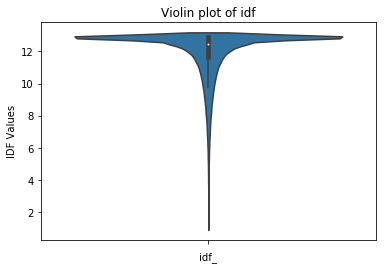

In [29]:
sns.violinplot(x = "IDF Values",data=tfidf_df,orient="v")
plt.xlabel("idf_")
plt.title("Violin plot of idf")

In [30]:
tfidf_df.head()

,Words,IDF Values
96989,the,1.179696
7574,and,1.211276
98094,to,1.370146
55128,it,1.397642
97346,this,1.429712


In [31]:
tfidf_df.tail()

,Words,IDF Values
46528,glucemic,12.889089
46527,glucasomine,12.889089
46525,glucan,12.889089
48107,groosly,12.889089
108314,ît,12.889089


In [0]:
corpus = tfidf_df[(tfidf_df['IDF Values'] >= 2) & (tfidf_df['IDF Values'] <=12 )]

In [33]:
corpus.shape

(35169, 2)

In [34]:
vocab = corpus["Words"].tolist()
vocab[:10]

['you', 'on', 'are', 'was', 'so', 'great', 'good', 'like', 'they', 'as']

In [0]:
# MAX_SEQUENCE_LENGTH = 800
# MAX_VOCAB_SIZE = 1000000
EMBEDDING_DIM = 300

In [0]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(vocab)
sequences_train = tokenizer.texts_to_sequences(X_train["total_text"])
sequences_test = tokenizer.texts_to_sequences(X_test["total_text"])

In [0]:
length = []

for i in sequences_train:

  length.append(len(i))

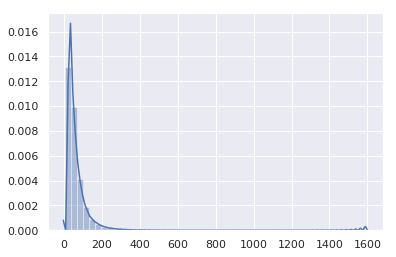

In [38]:
sns.set()
sns.distplot(length)

In [39]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 35165 unique tokens.


In [0]:
MAX_SEQUENCE_LENGTH = 150

In [41]:
encoded_train = pad_sequences(sequences_train,maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', encoded_train.shape)

Shape of data tensor: (291336, 150)


In [42]:
encoded_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', encoded_test.shape)

Shape of data tensor: (72835, 150)


In [43]:
# store all the pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open("glove/glove.6B.300d.txt") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [0]:
num_words = len(word2idx) + 1
embedding_matrix = np.zeros((num_words, 300))
for word, i in word2idx.items():
  if i < len(vocab):
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

In [58]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  300,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)
input_text = Input(shape=(MAX_SEQUENCE_LENGTH,),name="input_text")
x = embedding_layer(input_text)
# x = SpatialDropout1D(0.4)(x)
x = LSTM(256,dropout=0.5,kernel_regularizer=regularizers.l2(0.001))(x)
output = Dense(2, activation="softmax")(x)
model = Model(input_text, output)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      (None, 150)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 300)          10549800  
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               570368    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 11,120,682
Trainable params: 570,882
Non-trainable params: 10,549,800
_________________________________________________________________
None


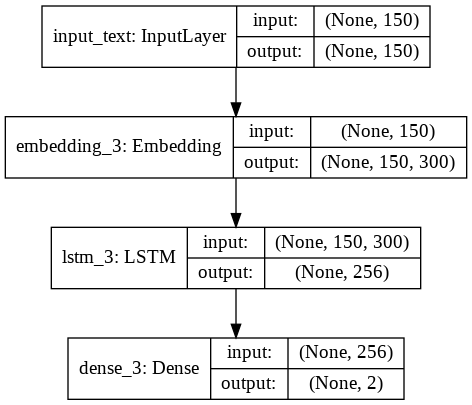

In [59]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb
from keras.utils import plot_model
import pydot_ng as pydot
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [0]:
checkpoint = ModelCheckpoint("model.h5",
                             monitor="val_auroc",
                             mode="max",
                             save_best_only = True,
                             verbose=1)

# earlystop_3 = EarlyStopping(monitor = 'val_loss', 
#                             mode="min",
#                             min_delta = 0, 
#                             patience = 2,
#                             verbose = 1,
#                             restore_best_weights = True)

# reduce_lr_3 = ReduceLROnPlateau(monitor = 'val_auroc', factor = 0.2, patience = 2, verbose = 1, min_delta = 0.0001)

tensorboard = TensorBoard(log_dir='graph', histogram_freq=0, batch_size=512, write_graph=True, write_grads=True, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

callbacks = [tensorboard,checkpoint]

In [0]:
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def auroc(y_true, y_pred):
    return tf.py_func(auc1, (y_true, y_pred), tf.double)

In [0]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [0]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 2) 
Y_test = np_utils.to_categorical(y_test, 2)

In [0]:
model.compile(optimizer=adam, loss='categorical_crossentropy',metrics=[auroc])

In [65]:
history = model.fit(encoded_train,Y_train,batch_size=512,
                        epochs=5,validation_data=(encoded_test,Y_test),callbacks=callbacks)

Train on 291336 samples, validate on 72835 samples
Epoch 1/5
291336/291336 [==============================] - 271s 929us/step - loss: 0.3051 - auroc: 0.9188 - val_loss: 0.2100 - val_auroc: 0.9654

Epoch 00001: val_auroc improved from -inf to 0.96541, saving model to model.h5
Epoch 2/5
291336/291336 [==============================] - 270s 928us/step - loss: 0.2003 - auroc: 0.9611 - val_loss: 0.1725 - val_auroc: 0.9712

Epoch 00002: val_auroc improved from 0.96541 to 0.97123, saving model to model.h5
Epoch 3/5
291336/291336 [==============================] - 270s 925us/step - loss: 0.1849 - auroc: 0.9668 - val_loss: 0.1600 - val_auroc: 0.9759

Epoch 00003: val_auroc improved from 0.97123 to 0.97586, saving model to model.h5
Epoch 4/5
291336/291336 [==============================] - 270s 926us/step - loss: 0.1767 - auroc: 0.9702 - val_loss: 0.1551 - val_auroc: 0.9776

Epoch 00004: val_auroc improved from 0.97586 to 0.97764, saving model to model.h5
Epoch 5/5
291336/291336 [===============

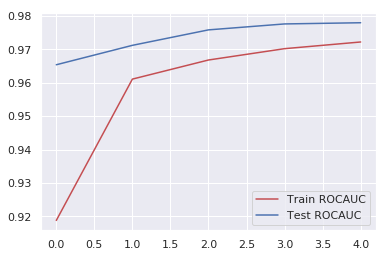

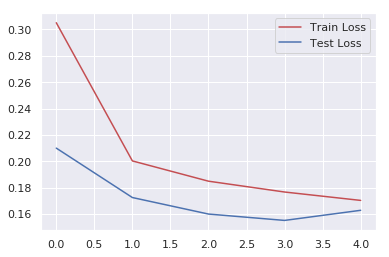

In [66]:
sns.set()
plt.plot(history.history['auroc'], 'r')
plt.plot(history.history['val_auroc'], 'b')
plt.legend({'Train ROCAUC': 'r', 'Test ROCAUC':'b'})
plt.show()


plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()